In [1]:
# https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/

In [2]:
print('''Autoencoder Neural Network architecture is divided into the encoder structure, the decoder structure, 
and the latent space, also known as the “bottleneck”. 
Autoencoders are used for image compression, feature extraction, dimensionality reduction.
''')

Autoencoder Neural Network architecture is divided into the encoder structure, the decoder structure, 
and the latent space, also known as the “bottleneck”. 
Autoencoders are used for image compression, feature extraction, dimensionality reduction.



In [3]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [4]:
# We will be using the popular MNIST dataset comprising grayscale images of handwritten single digits between 0 and 9.

# The dataset is downloaded and transformed into image tensors. 
# Using the DataLoader module, the tensors are loaded and ready to be used. 
# The dataset is loaded with Shuffling enabled and a batch size of 64.

In [5]:
import torch
from torchvision import datasets, transforms

# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Load the MNIST Dataset (assumes data is already downloaded)
# Load the MNIST Dataset from a specified directory
dataset = datasets.MNIST(
    root="/home/bogdan/Desktop/PyTorch/MNIST",  # Specify the exact directory
    train=True,
    download=False,  # Ensure re-download is skipped
    transform=tensor_transform
)
# DataLoader is used to load the dataset for training
loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=32,
    shuffle=True
)

In [6]:
print('''
In this coding snippet, the encoder section reduces the dimensionality of the data sequentially as given by:

28*28 = 784 ==> 128 ==> 64 ==> 36 ==> 18 ==> 9

Where the number of input nodes is 784 that are coded into 9 nodes in the latent space. 
Whereas, in the decoder section, the dimensionality of the data is linearly increased to the original input size, 
in order to reconstruct the input.

9 ==> 18 ==> 36 ==> 64 ==> 128 ==> 784 ==> 28*28 = 784

Where the input is the 9-node latent space representation and the output is the 28*28 reconstructed input.

The encoder starts with 28*28 nodes in a Linear layer followed by a ReLU layer, 
and it goes on until the dimensionality is reduced to 9 nodes. 
The decryptor uses these 9 data representations to bring back the original image by using the inverse of the encoder architecture. 
The decryptor architecture uses a Sigmoid Layer to range the values between 0 and 1 only.
''')


In this coding snippet, the encoder section reduces the dimensionality of the data sequentially as given by:

28*28 = 784 ==> 128 ==> 64 ==> 36 ==> 18 ==> 9

Where the number of input nodes is 784 that are coded into 9 nodes in the latent space. 
Whereas, in the decoder section, the dimensionality of the data is linearly increased to the original input size, 
in order to reconstruct the input.

9 ==> 18 ==> 36 ==> 64 ==> 128 ==> 784 ==> 28*28 = 784

Where the input is the 9-node latent space representation and the output is the 28*28 reconstructed input.

The encoder starts with 28*28 nodes in a Linear layer followed by a ReLU layer, 
and it goes on until the dimensionality is reduced to 9 nodes. 
The decryptor uses these 9 data representations to bring back the original image by using the inverse of the encoder architecture. 
The decryptor architecture uses a Sigmoid Layer to range the values between 0 and 1 only.



In [7]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28

class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()
		
		# Building an linear encoder with Linear
		# layer followed by Relu activation function
		# 784 ==> 9
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 9)
		)
		
		# Building an linear decoder with Linear
		# layer followed by Relu activation function
		# The Sigmoid activation function
		# outputs the value between 0 and 1
		# 9 ==> 784
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(9, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 28 * 28),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded


In [8]:
# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
							lr = 1e-1,
							weight_decay = 1e-8)

In [9]:
print('''
The output against each epoch is computed by passing as a parameter into the Model() class and 
the final tensor is stored in an output list. 
The image into (-1, 784) and is passed as a parameter to the Autoencoder class, which in turn returns a reconstructed image. 
The loss function is calculated using MSELoss function and plotted. 
In the optimizer, the initial gradient values are made to zero using zero_grad(). loss.backward() 
computes the grad values and stored. Using the step() function, the optimizer is updated.

The original image and the reconstructed image from the outputs list are detached and transformed into a NumPy Array 
for plotting the images.
''')


The output against each epoch is computed by passing as a parameter into the Model() class and 
the final tensor is stored in an output list. 
The image into (-1, 784) and is passed as a parameter to the Autoencoder class, which in turn returns a reconstructed image. 
The loss function is calculated using MSELoss function and plotted. 
In the optimizer, the initial gradient values are made to zero using zero_grad(). loss.backward() 
computes the grad values and stored. Using the step() function, the optimizer is updated.

The original image and the reconstructed image from the outputs list are detached and transformed into a NumPy Array 
for plotting the images.



Epoch [1/20], Loss: 0.1433
Epoch [2/20], Loss: 0.1260
Epoch [3/20], Loss: 0.1382
Epoch [4/20], Loss: 0.1303
Epoch [5/20], Loss: 0.0621
Epoch [6/20], Loss: 0.0665
Epoch [7/20], Loss: 0.0701
Epoch [8/20], Loss: 0.0631
Epoch [9/20], Loss: 0.0647
Epoch [10/20], Loss: 0.0672
Epoch [11/20], Loss: 0.0714
Epoch [12/20], Loss: 0.0689
Epoch [13/20], Loss: 0.0644
Epoch [14/20], Loss: 0.0691
Epoch [15/20], Loss: 0.0668
Epoch [16/20], Loss: 0.0681
Epoch [17/20], Loss: 0.0676
Epoch [18/20], Loss: 0.0646
Epoch [19/20], Loss: 0.0704
Epoch [20/20], Loss: 0.0721


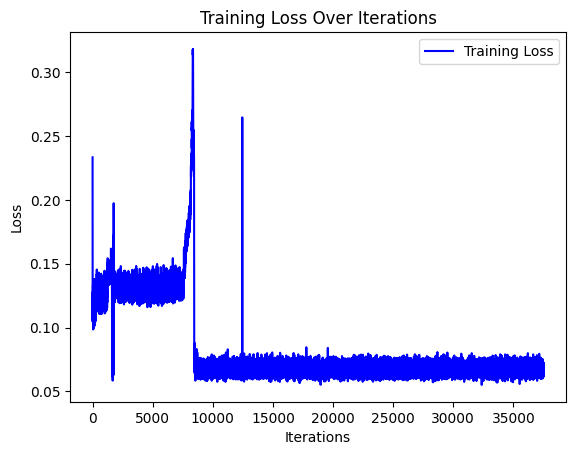

In [10]:
# Define the number of epochs
epochs = 20

# Initialize lists to store outputs and losses
outputs = []
losses = []

for epoch in range(epochs):
    for (image, _) in loader:
        # Reshaping the image to (-1, 784)
        image = image.view(-1, 28 * 28)  # Correct reshaping using `view`

        # Output of Autoencoder
        reconstructed = model(image)

        # Calculating the loss function
        loss = loss_function(reconstructed, image)

        # Zeroing the gradients, computing gradients, and updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.item())  # Convert tensor loss to a scalar
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

    # Store the output for visualization (optional)
    outputs.append((epoch, image, reconstructed))

# Plotting the Loss with a white background
plt.style.use('default')  # Set the default style with white background
plt.figure(facecolor='white')  # Ensure the figure has a white background

plt.plot(losses, label="Training Loss", color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.legend()
plt.show()

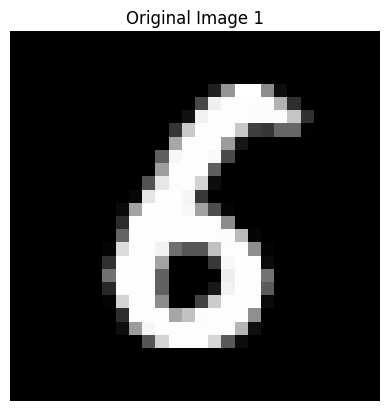

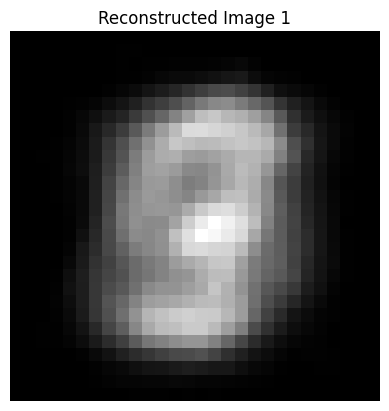

In [11]:
# Input/Reconstructed Input to/from Autoencoder

# The first input image array and the first reconstructed input image array 
# have been plotted using plt.imshow().

# Plot the original images
for i, item in enumerate(image[:1]):  # Limit to the first 10 images for clarity
    item = item.view(28, 28).cpu().numpy()  # Reshape and convert to numpy for plotting
    plt.figure()
    plt.imshow(item, cmap="gray")
    plt.axis("off")
    plt.title(f"Original Image {i+1}")
    plt.show()

# Plot the reconstructed images
for i, item in enumerate(reconstructed[:1]):  # Limit to the first 10 images for clarity
    item = item.view(28, 28).cpu().detach().numpy()  # Reshape and convert to numpy
    plt.figure()
    plt.imshow(item, cmap="gray")
    plt.axis("off")
    plt.title(f"Reconstructed Image {i+1}")
    plt.show()


In [12]:
print('''
Although the rebuilt pictures appear to be adequate, they are extremely grainy. 
To enhance this outcome, extra layers and/or neurons may be added, 
or the autoencoder model could be built on convolutions neural network architecture
''')


Although the rebuilt pictures appear to be adequate, they are extremely grainy. 
To enhance this outcome, extra layers and/or neurons may be added, 
or the autoencoder model could be built on convolutions neural network architecture



In [13]:
# Code generated by GPT-4o :

In [14]:
import torch
import torch.nn as nn  

In [15]:
# Define the Autoencoder
class AE(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder: Compress input to latent space (9 dimensions)
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)  # Latent space of size 9
        )
        # Decoder: Reconstruct input from latent space
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)  # Get latent representation
        decoded = self.decoder(encoded)  # Reconstruct input
        return encoded, decoded

Epoch [1/20], Loss: 0.0517
Epoch [2/20], Loss: 0.0344
Epoch [3/20], Loss: 0.0296
Epoch [4/20], Loss: 0.0268
Epoch [5/20], Loss: 0.0254
Epoch [6/20], Loss: 0.0246
Epoch [7/20], Loss: 0.0240
Epoch [8/20], Loss: 0.0234
Epoch [9/20], Loss: 0.0226
Epoch [10/20], Loss: 0.0219
Epoch [11/20], Loss: 0.0214
Epoch [12/20], Loss: 0.0210
Epoch [13/20], Loss: 0.0207
Epoch [14/20], Loss: 0.0205
Epoch [15/20], Loss: 0.0202
Epoch [16/20], Loss: 0.0199
Epoch [17/20], Loss: 0.0195
Epoch [18/20], Loss: 0.0191
Epoch [19/20], Loss: 0.0189
Epoch [20/20], Loss: 0.0186


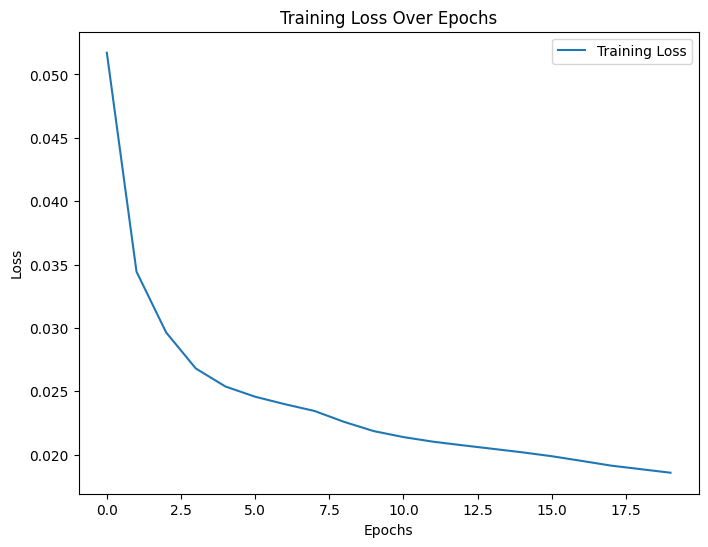

In [16]:
# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AE().to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training the Autoencoder
epochs = 30
losses = []

for epoch in range(epochs):
    epoch_loss = 0
    for batch, (images, _) in enumerate(loader):
        images = images.view(-1, 28 * 28).to(device)  # Flatten input
        encoded, decoded = model(images)  # Forward pass

        loss = loss_function(decoded, images)  # Compute reconstruction loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(loader)
    losses.append(epoch_loss)
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}")

# Plot Training Loss
plt.figure(figsize=(8, 6))
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Over Epochs")
plt.show()

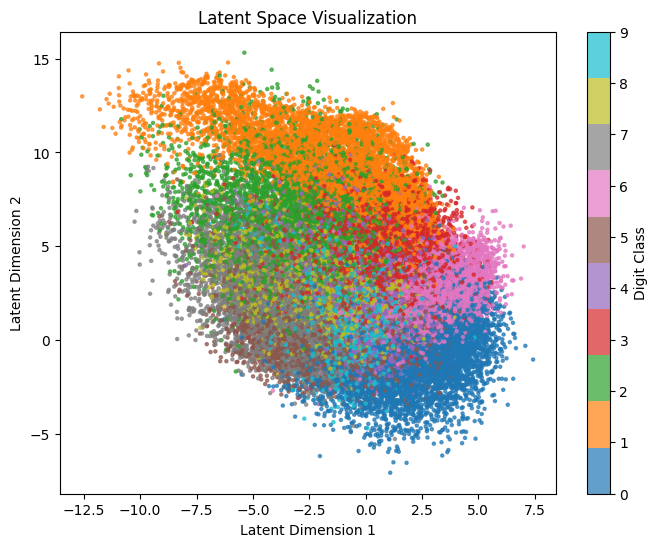

In [17]:
# Visualizing Latent Representations
latent_space = []
labels = []

model.eval()

with torch.no_grad():
    for batch, (images, targets) in enumerate(loader):
        images = images.view(-1, 28 * 28).to(device)
        encoded, _ = model(images)  # Get latent representation
        latent_space.append(encoded.cpu())
        labels.append(targets)

latent_space = torch.cat(latent_space).numpy()
labels = torch.cat(labels).numpy()

# Plot Latent Space (First 2 Dimensions)
plt.figure(facecolor='white', figsize=(8, 6))  # White background and figure size
scatter = plt.scatter(latent_space[:, 0], latent_space[:, 1], c=labels, cmap="tab10", alpha=0.7, s=5)
plt.colorbar(scatter, label="Digit Class")

# Adjust title, axis labels, and overall style
plt.title("Latent Space Visualization", fontsize=12)  # Smaller title font size
plt.xlabel("Latent Dimension 1", fontsize=10)        # Smaller font for x-axis label
plt.ylabel("Latent Dimension 2", fontsize=10)        # Smaller font for y-axis label

plt.show()

# Display Original and Reconstructed Images
num_images = 10
images, _ = next(iter(loader))
images = images[:num_images].view(-1, 28 * 28).to(device)
_, reconstructed = model(images)

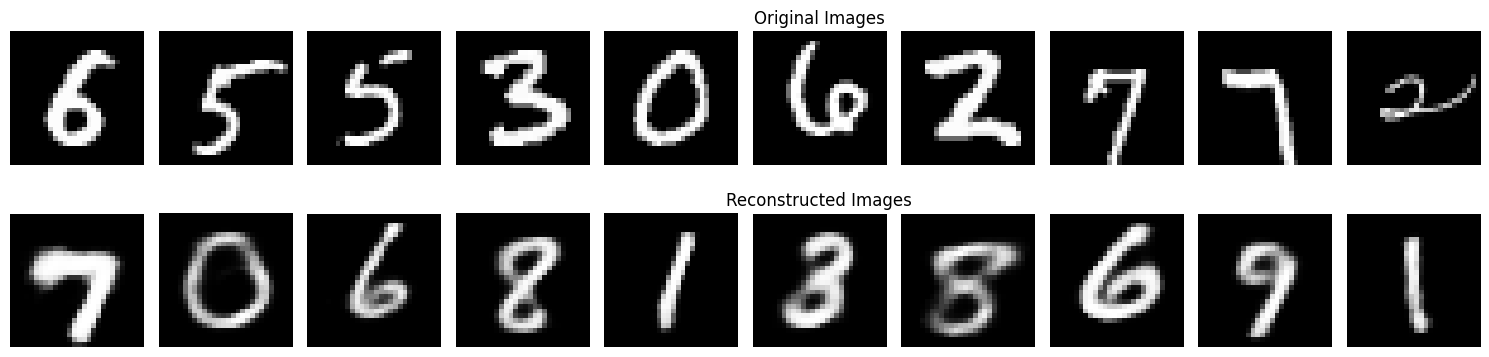

In [18]:
# Number of images to display
num_images = 10

# Prepare original and reconstructed images
original_images = image[:num_images].view(-1, 28, 28).cpu().numpy()
reconstructed_images = reconstructed[:num_images].view(-1, 28, 28).cpu().detach().numpy()

# Create subplots with 2 rows: one for originals and one for reconstructions
fig, axes = plt.subplots(2, num_images, figsize=(15, 4))

for i in range(num_images):
    # Original images
    axes[0, i].imshow(original_images[i], cmap="gray")
    axes[0, i].axis("off")
    if i == num_images // 2:
        axes[0, i].set_title("Original Images")

    # Reconstructed images
    axes[1, i].imshow(reconstructed_images[i], cmap="gray")
    axes[1, i].axis("off")
    if i == num_images // 2:
        axes[1, i].set_title("Reconstructed Images")

plt.tight_layout()
plt.show()
